In [2]:
import os
import pandas as pd

# 定义数据文件夹路径
data_dir = '/Users/yichunzhang/Documents/Project - NLP/archive/bbc' 


In [3]:
# 初始化空的列表来存储数据
texts = []
categories = []

In [4]:
# 遍历文件夹
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    
    if os.path.isdir(category_path):
        # 遍历每个类别文件夹中的文件
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            
            # 确保文件路径是真正的文件，而不是目录
            if os.path.isfile(file_path):
                # 读取文件内容，添加错误处理参数
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                    text = file.read()
                    texts.append(text)
                    categories.append(category)

# 创建DataFrame
data = pd.DataFrame({'text': texts, 'category': categories})

In [5]:
# 查看前几行数据
print(data.head())


                                                text       category
0  Musicians to tackle US red tape\n\nMusicians' ...  entertainment
1  U2's desire to be number one\n\nU2, who have w...  entertainment
2  Rocker Doherty in on-stage fight\n\nRock singe...  entertainment
3  Snicket tops US box office chart\n\nThe film a...  entertainment
4  Ocean's Twelve raids box office\n\nOcean's Twe...  entertainment


In [6]:
import string
import nltk
from nltk.corpus import stopwords

In [7]:
# 数据预处理函数
def preprocess_text(text):
    # 检查文本是否为NaN
    if pd.isna(text):
        return ''
    # 去除标点符号
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 转换为小写
    text = text.lower()
    # 去除停用词
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yichunzhang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
data['clean_text'] = data['text'].apply(preprocess_text)
print(data[['category', 'clean_text']].head())


        category                                         clean_text
0  entertainment  musicians tackle us red tape musicians groups ...
1  entertainment  u2s desire number one u2 three prestigious gra...
2  entertainment  rocker doherty onstage fight rock singer pete ...
3  entertainment  snicket tops us box office chart film adaptati...
4  entertainment  oceans twelve raids box office oceans twelve c...


In [13]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 21.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 42.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 创建TF-IDF向量器
tfidf = TfidfVectorizer(max_features=5000)

# 将文本数据向量化
X = tfidf.fit_transform(data['clean_text']).toarray()

# 获取类别标签
y = data['category']

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TF-IDF向量化后的数据形状:", X_train.shape)


TF-IDF向量化后的数据形状: (1781, 5000)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# 创建Naive Bayes分类器
model = MultinomialNB()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 输出分类报告
print("分类报告:\n", classification_report(y_test, y_pred))

# 输出混淆矩阵
print("混淆矩阵:\n", confusion_matrix(y_test, y_pred))


分类报告:
                precision    recall  f1-score   support

        .venv       0.00      0.00      0.00         1
     business       0.99      0.99      0.99       107
entertainment       1.00      0.98      0.99        84
     politics       0.95      0.99      0.97        78
        sport       0.99      1.00      0.99        95
         tech       0.99      0.98      0.98        81

     accuracy                           0.98       446
    macro avg       0.82      0.82      0.82       446
 weighted avg       0.98      0.98      0.98       446

混淆矩阵:
 [[  0   0   0   0   1   0]
 [  0 106   0   1   0   0]
 [  0   0  82   2   0   0]
 [  0   0   0  77   0   1]
 [  0   0   0   0  95   0]
 [  0   1   0   1   0  79]]


/Users/yichunzhang/Documents/Project - NLP/archive/bbc/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yichunzhang/Documents/Project - NLP/archive/bbc/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yichunzhang/Documents/Project - NLP/archive/bbc/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [16]:
!pip install vaderSentiment


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 创建VADER情感分析器
analyzer = SentimentIntensityAnalyzer()

# 添加情感分数到DataFrame
data['sentiment'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 查看数据，看看情感分数是如何分布的
print(data[['category', 'clean_text', 'sentiment']].head())


        category                                         clean_text  sentiment
0  entertainment  musicians tackle us red tape musicians groups ...     0.9022
1  entertainment  u2s desire number one u2 three prestigious gra...     0.9836
2  entertainment  rocker doherty onstage fight rock singer pete ...    -0.7906
3  entertainment  snicket tops us box office chart film adaptati...    -0.4019
4  entertainment  oceans twelve raids box office oceans twelve c...     0.9218


In [19]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


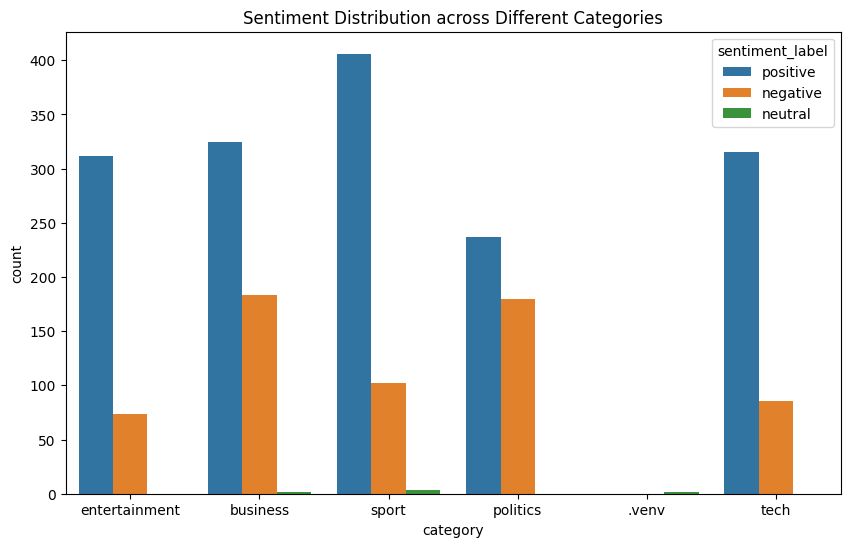

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置情感得分的正负面阈值
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# 可视化不同类别的情感分布
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='sentiment_label', data=data)
plt.title('Sentiment Distribution across Different Categories')
plt.show()


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 再次创建TF-IDF向量器，用于关键词提取
tfidf_vectorizer = TfidfVectorizer(max_features=10)  # 我们只提取前10个关键词

# 为每个文档生成关键词
data['keywords'] = data['clean_text'].apply(lambda x: ' '.join(tfidf_vectorizer.fit([x]).get_feature_names_out()))

# 查看数据，看看提取的关键词
print(data[['category', 'clean_text', 'keywords']].head())


        category                                         clean_text  \
0  entertainment  musicians tackle us red tape musicians groups ...   
1  entertainment  u2s desire number one u2 three prestigious gra...   
2  entertainment  rocker doherty onstage fight rock singer pete ...   
3  entertainment  snicket tops us box office chart film adaptati...   
4  entertainment  oceans twelve raids box office oceans twelve c...   

                                            keywords  
0  acts added british mccune musicians said union...  
1  album band make music new one rock still top want  
2  babyshambles bail doherty fans fight guitarist...  
3  box carrey chart film lemony number office sni...  
4  box clooney oceans office project roberts sequ...  
